<a href="https://colab.research.google.com/github/Albert8754/NextGrowthLabs/blob/main/part1_question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('/content/chrome_reviews (1).csv')

In [25]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [26]:
df.shape

(7204, 10)

In [27]:
df1=df[['Text','Star']]
df1

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [28]:
df1.isna().sum()

Text    1
Star    0
dtype: int64

In [29]:
#we can drop the missing value because it wont change ihe accuracy of the model by large mean()
df1.dropna()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [30]:
import nltk
import re

In [31]:
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
port=PorterStemmer()
def cleaner(text):
    clean=re.sub('a-zA-z','',text)
    clean=clean.lower()
    clean=clean.split()
    clean=[port.stem(word) for word in clean if word not in stopwords.words('english')]
    clean=''.join(clean)
    return clean

In [33]:
df1['cleaned']=df1['Text'].apply(lambda x:cleaner(str(x)))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,cleaned
0,This is very helpfull aap.,5,helpfulaap.
1,Good,3,good
2,Not able to update. Neither able to uninstall.,1,ablupdate.neitherabluninstall.
3,Nice app,4,niceapp
4,Many unwanted ads,1,maniunwantad


In [35]:
df1['len']=df1['Text'].apply(lambda x:len(str(x)))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,cleaned,len
0,This is very helpfull aap.,5,helpfulaap.,26
1,Good,3,good,4
2,Not able to update. Neither able to uninstall.,1,ablupdate.neitherabluninstall.,46
3,Nice app,4,niceapp,8
4,Many unwanted ads,1,maniunwantad,17
...,...,...,...,...
7199,Bagusss..,5,bagusss..,9
7200,Bad version 😔,1,badversion😔,13
7201,One thing that I have to say I can't spelled t...,5,onethingsaycan'tspellgoodproblemtrispellbest,105
7202,Excellent,5,excel,9


In [36]:

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
def sentiment_vader(text,sid):
  ss=sid.polarity_scores(text)
  ss.pop('compound')
  return max(ss,key=ss.get)

In [38]:

def sentiment_textblob(text):
  x=TextBlob(text).sentiment.polarity

  if x<0:
    return 'neg'
  if x==0:
    return 'neu'
  else:return 'neg'


In [39]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df1['score']=df1['cleaned'].apply(lambda review:sid.polarity_scores(review))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df1.head()

,Text,Star,cleaned,len,score
0,This is very helpfull aap.,5,helpfulaap.,26,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,Not able to update. Neither able to uninstall.,1,ablupdate.neitherabluninstall.,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Nice app,4,niceapp,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Many unwanted ads,1,maniunwantad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [42]:
df1['updated']=df1['score'].apply(lambda score_dict:score_dict['compound'])
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,cleaned,len,score,updated
0,This is very helpfull aap.,5,helpfulaap.,26,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
2,Not able to update. Neither able to uninstall.,1,ablupdate.neitherabluninstall.,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Nice app,4,niceapp,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Many unwanted ads,1,maniunwantad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [43]:
df1['result']=df1['updated'].apply(lambda c:'positive' if c>0 else ('no review needed'))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,cleaned,len,score,updated,result
0,This is very helpfull aap.,5,helpfulaap.,26,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,no review needed
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
2,Not able to update. Neither able to uninstall.,1,ablupdate.neitherabluninstall.,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,no review needed
3,Nice app,4,niceapp,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,no review needed
4,Many unwanted ads,1,maniunwantad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,no review needed


In [44]:
df1['result'].value_counts()

no review needed    5283
positive            1921
Name: result, dtype: int64

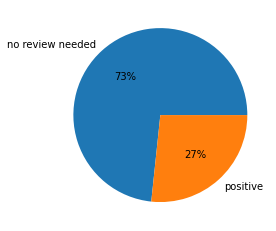

In [52]:
plt.pie(df1["result"].value_counts(),labels=df1["result"].value_counts().index, autopct="%.0f%%")
plt.show()

In [53]:
post=df1[(df1['result']=='positive')]

In [54]:
post.head()

,Text,Star,cleaned,len,score,updated,result
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
16,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
21,Best,4,best,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6369,positive
22,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive


In [55]:
change=[]
for i in post['Star']:
  if i>3 :
    change.append('neglect')
  else:
    change.append('error')

In [56]:
post['ratting error']=change
post.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Text,Star,cleaned,len,score,updated,result,ratting error
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,error
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,neglect
16,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,neglect
21,Best,4,best,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6369,positive,neglect
22,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,neglect


In [58]:
post['ratting error'].value_counts()

neglect    1710
error       211
Name: ratting error, dtype: int64

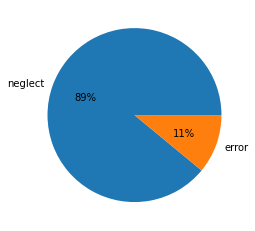

In [59]:
plt.pie(post["ratting error"].value_counts(),labels=post["ratting error"].value_counts().index, autopct="%.0f%%")
plt.show()